<a href="https://colab.research.google.com/github/sitinatazha/Data-Pre-processing-/blob/main/Data_Pre_processing_GSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Pre - Processing
1. Handling Missing Value -> X tapi cek datanya apakah ada yang empty
2. Remove Duplicate -> based on order id
3. Convert Data Types -> untuk kolom order date
4.  Special Character & Double Space -> cek unique values

In [ ]:
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/kelas python/Grocery Sales Dataset.csv')

In [ ]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [ ]:
df['Sub Category'].unique()

array(['Masalas', 'Health Drinks', 'Atta & Flour', 'Fresh Vegetables',
       'Organic Staples', 'Fresh Fruits', 'Biscuits', 'Cakes',
       'Chocolates', 'Eggs', 'Cookies', 'Chicken', 'Edible Oil & Ghee',
       'Mutton', 'Soft Drinks', 'Dals & Pulses', 'Organic Vegetables',
       'Noodles', 'Organic Fruits', 'Fish', 'Spices', 'Rice',
       'Breads & Buns'], dtype=object)

In [ ]:
df.isnull().all()

Order ID         False
Customer Name    False
Category         False
Sub Category     False
City             False
Order Date       False
Region           False
Sales            False
Discount         False
Profit           False
State            False
dtype: bool

In [ ]:
#remove duplicates
df = df.drop_duplicates(subset=['Order ID'], keep='first')

In [ ]:
df['Order Date'].replace('/', '-', inplace=True)

In [ ]:
#convert data types
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [ ]:
df

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,2015-12-24,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,2015-07-12,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,2017-06-06,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,2018-10-16,West,1659,0.15,597.24,Tamil Nadu


In [ ]:
#cpecial Character & double space

## cleansing column or rows
1. apakah ada kolom yang perlu di remove atau tidak? dan remove kolom tidak diperlukan
2. cek apakah ada rows yang perlu di remove? kapan perlu -> saat baris atau record tsb punya data yang outliers dalam value categoricalnya. Misal data kita sales Indonesia tapi ada 1 atau beberapa data mancanegara yg nyangkut. perlu diremove
3. cek data numerical ada outlier atau engga

In [ ]:
#remove
df.drop('State', axis=1, inplace=True)
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45


In [ ]:
df = df[df['Region']!='North']
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,2015-06-09,West,2305,0.26,322.70


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


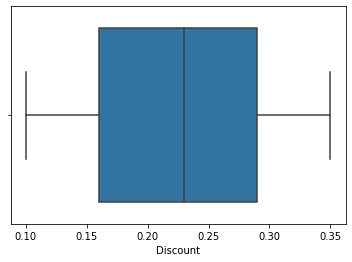

In [ ]:
#cek data numerical ada outliers atau engga
import seaborn as sns
sns.boxplot(df['Discount'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


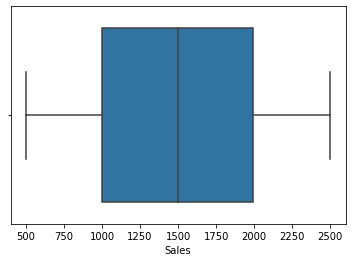

In [ ]:
#cek data numerical ada outliers atau engga
import seaborn as sns
sns.boxplot(df['Sales'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


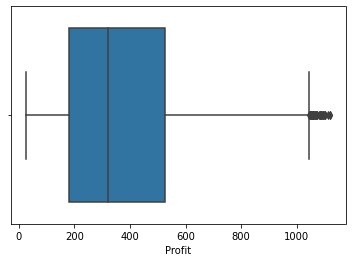

In [ ]:
import seaborn as sns
sns.boxplot(df['Profit'])

In [ ]:
# Position of the Outlier
import numpy as np
print(np.where(df['Profit']>1000))

(array([  42,   70,  103,  149,  157,  782, 1114, 1273, 1298, 1303, 1369,
       1411, 1610, 1696, 1766, 1806, 1820, 1896, 1997, 2243, 2334, 2414,
       2461, 2527, 2534, 2656, 2700, 2713, 2835, 3000, 3143, 3158, 3242,
       3250, 3359, 3398, 3435, 3436, 3466, 3490, 3494, 3580, 3703, 3710,
       4074, 4135, 4176, 4291, 4315, 4360, 4538, 4626, 4788, 4808, 4842,
       4876, 4942, 4963, 4964, 5017, 5043, 5083, 5086, 5164, 5412, 5423,
       5646, 5672, 5736, 5855, 6248, 6518, 6585, 6651, 6667, 6792, 6819,
       6892, 6914, 7145, 7248, 7302, 7336, 7479, 7547, 7778, 7898, 8062,
       8132, 8133, 8185, 8223, 8290, 8366, 8742, 8756, 8854, 9003, 9304,
       9519, 9540, 9600, 9623, 9701, 9767, 9781, 9801, 9864, 9910, 9947,
       9951]),)


#TASK
1. Berapa Harga Sales sebelum discount ( bikin column baru )
2. Berapa besar amount discount ( bikin column baru )
3. Apakah ada perbedaan rataan sales & profit untuk category Food Grains & Beverages?
4. Apakah ada perbedaan rataan sales antara overall region dan south region?
5. Cek data numerical ada outliers atau tidak?


In [ ]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


1. Berapa Harga Sales sebelum discount ( bikin column baru )

In [ ]:
df['Sales Sebelum Discount'] = ((1/(1-df['Discount'])) * df['Sales']).round()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


2.Berapa besar amount discount ( bikin column baru )

In [ ]:
df['Amount Discount'] = (df['Sales Sebelum Discount'] * df['Discount']).round()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,Sales Sebelum Discount,Amount Discount
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,913.0,164.0
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,2987.0,627.0
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,1195.0,299.0
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,3182.0,827.0
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,2015-06-09,West,2305,0.26,322.70,3115.0,810.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,2015-12-24,West,945,0.16,359.10,1125.0,180.0
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,2015-07-12,West,1195,0.26,71.70,1615.0,420.0
9991,OD9992,Ravi,Food Grains,Rice,Bodi,2017-06-06,West,1567,0.16,501.44,1865.0,298.0
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,2018-10-16,West,1659,0.15,597.24,1952.0,293.0


In [ ]:
#define samples
group1 = df[df['Category']=='Food Grains']
group2 = df[df['Category']=='Beverages']

#perform independent two sample t-test
ttest_ind(group1['Sales'], group2['Sales'])

Ttest_indResult(statistic=1.0789824487102577, pvalue=0.280688622201186)

In [ ]:
group3 = df[df['Category']=='Food Grains']
group4 = df[df['Category']=='Beverages']

#perform independent two sample t-test
ttest_ind(group3['Profit'], group4['Profit'])

Ttest_indResult(statistic=0.33928302802996907, pvalue=0.7344220072741423)

## 5. mengencek data numericnya ada outlier atau tidak

In [ ]:
df['Profit'].describe()

count    9994.000000
mean      374.937082
std       239.932881
min        25.250000
25%       180.022500
50%       320.780000
75%       525.627500
max      1120.950000
Name: Profit, dtype: float64

In [ ]:
print(df.describe())

             Sales     Discount       Profit
count  9994.000000  9994.000000  9994.000000
mean   1496.596158     0.226817   374.937082
std     577.559036     0.074636   239.932881
min     500.000000     0.100000    25.250000
25%    1000.000000     0.160000   180.022500
50%    1498.000000     0.230000   320.780000
75%    1994.750000     0.290000   525.627500
max    2500.000000     0.350000  1120.950000


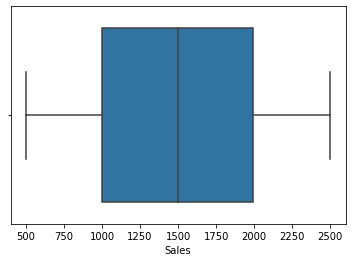

In [ ]:
#mendeteksi outlier
sns.boxplot(x='Sales',data=df)

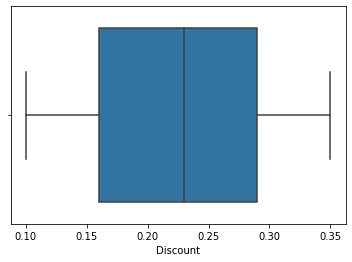

In [ ]:
sns.boxplot(x='Discount',data=df)

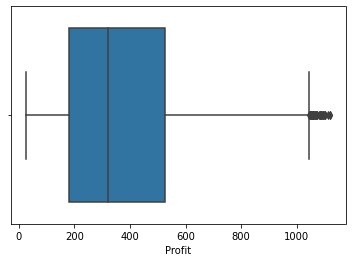

In [ ]:
y=sns.boxplot(x='Profit',data=df)

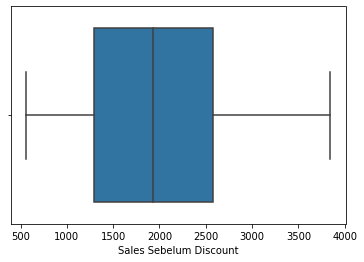

In [ ]:
sns.boxplot(x='Sales Sebelum Discount',data=df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 1 to 9993
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                9993 non-null   object        
 1   Customer Name           9993 non-null   object        
 2   Category                9993 non-null   object        
 3   Sub Category            9993 non-null   object        
 4   City                    9993 non-null   object        
 5   Order Date              9993 non-null   datetime64[ns]
 6   Region                  9993 non-null   object        
 7   Sales                   9993 non-null   int64         
 8   Discount                9993 non-null   float64       
 9   Profit                  9993 non-null   float64       
 10  Sales Sebelum Discount  9993 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 936.8+ KB
